In [1]:
# autoload python code
%load_ext autoreload
%autoreload 2
from analysis_helper import (
    collect_history_summary, 
    collect_paper_log, 
    plot_daily_paper_count,
    list_all_header2,
list_all_header3
)
from TopicPreprocessor import TopicPreprocessor
from TopicSimilarityAnalyzer import TopicSimilarityAnalyzer

C:\Users\jiaqyin\AppData\Local\miniconda3\envs\ArxivSummary\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


# Load the past history

In [2]:
history_data = collect_history_summary(input_dir='../data/history')

In [3]:
dates = list(history_data.keys())
dates = sorted(dates)
print(f'There are {len(dates)} dates in the history data, starting from {dates[0]} to {dates[-1]}')

There are 25 dates in the history data, starting from 2024-10-04 to 2024-11-05


# Paper count

In [4]:
paper_log_df = collect_paper_log(history_data)
print('Paper count:', paper_log_df.shape[0])

Paper count: 1759


In [5]:
paper_log_df.head()

,title,authors,abstract,published,category,pdf_url,saved_title
0,FakeShield: Explainable Image Forgery Detectio...,"Zhipei Xu, Xuanyu Zhang, Runyi Li, Zecheng Tan...",The rapid development of generative AI is a do...,2024-10-03 17:59:34+00:00,cs.CV,http://arxiv.org/pdf/2410.02761v1,FakeShield_Explainable_Image_Forgery_Detection...
1,SIEVE: General Purpose Data Filtering System M...,"Jifan Zhang, Robert Nowak",Creating specialized large language models req...,2024-10-03 17:58:29+00:00,cs.CL,http://arxiv.org/pdf/2410.02755v1,SIEVE_General_Purpose_Data_Filtering_System_Ma...
2,Training Language Models on Synthetic Edit Seq...,"Ulyana Piterbarg, Lerrel Pinto, Rob Fergus",Software engineers mainly write code by editin...,2024-10-03 17:57:22+00:00,cs.LG,http://arxiv.org/pdf/2410.02749v1,Training_Language_Models_on_Synthetic_Edit_Seq...
3,CriSPO: Multi-Aspect Critique-Suggestion-guide...,"Han He, Qianchu Liu, Lei Xu, Chaitanya Shivade...",Large language models (LLMs) can generate flue...,2024-10-03 17:57:01+00:00,cs.CL,http://arxiv.org/pdf/2410.02748v1,CriSPO_MultiAspect_CritiqueSuggestionguided_Au...
4,Neutral residues: revisiting adapters for mode...,"Franck Signe Talla, Herve Jegou, Edouard Grave",We address the problem of extending a pretrain...,2024-10-03 17:55:17+00:00,cs.CL,http://arxiv.org/pdf/2410.02744v1,Neutral_residues_revisiting_adapters_for_model...


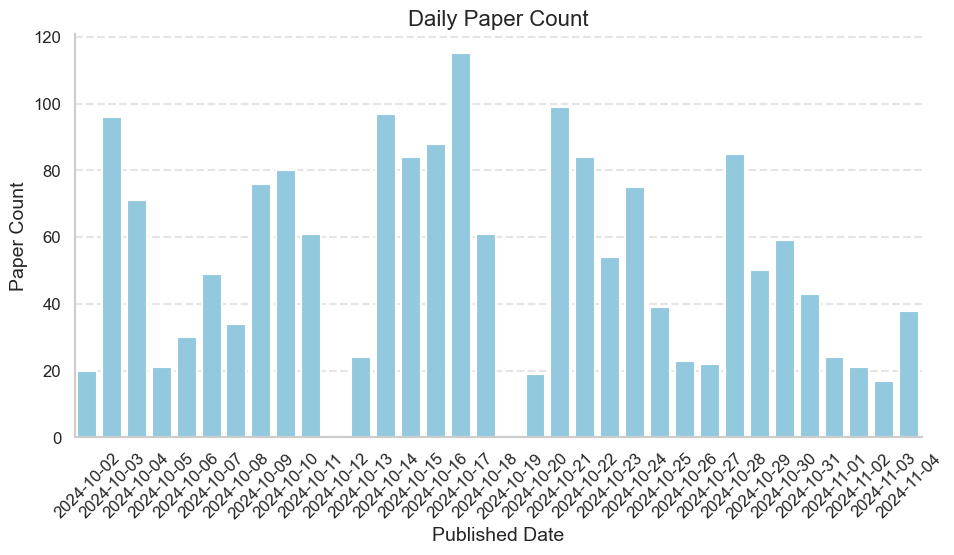

In [6]:
plot_daily_paper_count(paper_log_df)

# Content Analysis

In [7]:
list_all_header2(history_data)

{'Paper Catalog and Overview': 6,
 'Key Research Themes': 25,
 'Innovative or High-Impact Papers': 25,
 'Research Trends Analysis': 3,
 'Methodological Approaches': 25,
 'Interdisciplinary Connections': 3,
 'Challenges and Future Directions': 25,
 'Concluding Overview': 25,
 'Paper Catalog': 19}

In [8]:
all_themes = list_all_header3(history_data, 'Key Research Themes')
all_methods = list_all_header3(history_data, 'Methodological Approaches')

## Step 1. data preparation
1. Convert list of topics into a standardized format
    - Remove punctuation and standardize case
    - Split compound phrases (if needed)
    - Create a clean dataset where each topic is on a separate line

2. Initial Topic Preprocessing
    - Identify key terms and phrases
    - Remove common stopwords
    - Consider lemmatization to standardize word forms
Example transformations:
"Efficiency and Cost Reduction in Model Training" → ["efficiency", "cost reduction", "model training"]
"Enhancing Model Efficiency and Scalability" → ["model efficiency", "scalability"]

In [9]:
theme_preprocessor = TopicPreprocessor()
theme_data = theme_preprocessor.process_text(all_themes)

theme_data

,date,original_topic,cleaned_topic,original_phrases,lemmatized_phrases
0,2024-10-04,Explainability and Interpretability in NLP,explainability and interpretability in nlp,"[explainability, interpretability]","[explainability, interpretability]"
1,2024-10-04,Efficiency and Cost Reduction in Model Trainin...,efficiency and cost reduction in model trainin...,"[efficiency cost reduction, model training, in...","[efficiency cost reduction, model training, in..."
2,2024-10-04,Enhancing Model Robustness and Safety,enhancing model robustness and safety,"[model robustness, safety]","[model robustness, safety]"
3,2024-10-04,Multimodal Integration and Applications,multimodal integration and applications,"[multimodal integration, applications]","[multimodal integration, application]"
4,2024-10-05,Explainability and Interpretability in NLP,explainability and interpretability in nlp,"[explainability, interpretability]","[explainability, interpretability]"
...,...,...,...,...,...
104,2024-11-04,Challenges in Long-Context and Complex Reasoning,challenges in long-context and complex reasoning,"[challenges, long- context complex reasoning]","[challenge, long-context complex reasoning]"
105,2024-11-05,Multilingual and Cross-Lingual Capabilities of...,multilingual and cross-lingual capabilities of...,[multilingual cross- lingual capabilities],[multilingual cross-lingual capability]
106,2024-11-05,Improving LLM Reliability and Safety,improving llm reliability and safety,"[reliability, safety]","[reliability, safety]"
107,2024-11-05,Integration of LLMs in Specific Domains,integration of llms in specific domains,"[integration, specific domains]","[integration, specific domain]"


In [10]:
method_preprocessor = TopicPreprocessor()
method_data = method_preprocessor.process_text(all_methods)
method_data


,date,original_topic,cleaned_topic,original_phrases,lemmatized_phrases
0,2024-10-04,Explainable AI Techniques,explainable ai techniques,[techniques],[technique]
1,2024-10-04,Cost-Effective Data Filtering,cost-effective data filtering,[cost- effective data filtering],[effective data filtering]
2,2024-10-04,Real-Time Safety Adjustments,real-time safety adjustments,[real- time safety adjustments],[time safety adjustment]
3,2024-10-05,Explainable AI Techniques,explainable ai techniques,[techniques],[technique]
4,2024-10-05,Cost-Effective Data Filtering,cost-effective data filtering,[cost- effective data filtering],[effective data filtering]
...,...,...,...,...,...
96,2024-11-04,Long-Context Processing Techniques,long-context processing techniques,[long- context processing techniques],[long-context process technique]
97,2024-11-05,Phoneme-Based Multilingual Enhancements,phoneme-based multilingual enhancements,[phoneme- multilingual enhancements],[multilingual enhancement]
98,2024-11-05,Dynamic Semantic Clustering for Uncertainty Qu...,dynamic semantic clustering for uncertainty qu...,"[dynamic semantic clustering, uncertainty quan...","[dynamic semantic clustering, uncertainty quan..."
99,2024-11-05,Dynamic Inference in Multimodal Models,dynamic inference in multimodal models,"[dynamic inference, multimodal models]","[dynamic inference, multimodal model]"


## Step 2. Automated Topic Analysis

1. Semantic Similarity. Use embedding-based similarity to group topics:
   - Convert each topic phrase into embeddings
   - Calculate similarity scores between all pairs
   - Create a similarity matrix
   - Set a threshold to define clusters

In [11]:
theme_similarity_analyzer = TopicSimilarityAnalyzer(similarity_threshold=0.7)
topics  = theme_data['lemmatized_phrases'].sum()
# Run complete analysis
topic_groups, topic_stats, summary_df = theme_similarity_analyzer.analyze_topics(topics)

# Print summary
theme_similarity_analyzer.print_summary(topic_stats)

# Get top topics if needed
top_topics = theme_similarity_analyzer.get_top_topics(topic_stats, top_n=10)

fig = theme_similarity_analyzer.create_topic_bar_chart(
    topic_stats,
    top_n=15,
    width=1000,
    height=600,
    title="Distribution of Research Topics",
    save_path="topic_theme_visualization.html"
)

Topic Analysis Summary
Total topic mentions: 154
Total unique variations: 64
Number of topic groups: 29

Top 10 Topic Groups by Frequency:
--------------------------------

Representative Topic: multimodal multilingual capability
Count: 34 (17.7%)
Unique Variations: 16
Similar Topics:
  - multimodal cross-modal integration
  - multimodal cross-domain application
  - multilingual cross-lingual capability
  - multimodal cross-lingual capability
  - language model alignment
  ... and 11 more

Representative Topic: interpretability
Count: 10 (5.2%)
Unique Variations: 2
Similar Topics:
  - interpretability
  - explainability

Representative Topic: evaluation
Count: 10 (5.2%)
Unique Variations: 1
Similar Topics:
  - evaluation

Representative Topic: efficiency
Count: 9 (4.7%)
Unique Variations: 3
Similar Topics:
  - model efficiency
  - efficiency cost reduction
  - efficiency

Representative Topic: safety
Count: 9 (4.7%)
Unique Variations: 1
Similar Topics:
  - safety

Representative Topic:

In [12]:
method_similarity_analyzer = TopicSimilarityAnalyzer(similarity_threshold=0.7)
topics  = method_data['lemmatized_phrases'].sum()
# Run complete analysis
topic_groups, topic_stats, summary_df = method_similarity_analyzer.analyze_topics(topics)

# Print summary
method_similarity_analyzer.print_summary(topic_stats)

# Get top topics if needed
top_topics = method_similarity_analyzer.get_top_topics(topic_stats, top_n=10)

fig = method_similarity_analyzer.create_topic_bar_chart(
    topic_stats,
    top_n=15,
    width=1000,
    height=600,
    title="Distribution of Methodological Approaches",
    save_path="topic_method_visualization.html"
)


Topic Analysis Summary
Total topic mentions: 65
Total unique variations: 30
Number of topic groups: 17

Top 10 Topic Groups by Frequency:
--------------------------------

Representative Topic: retrieval-augmented generation
Count: 15 (12.6%)
Unique Variations: 2
Similar Topics:
  - retrieval-augmented generation
  - retrieval-augmented generation system

Representative Topic: multimodal integration
Count: 8 (6.7%)
Unique Variations: 5
Similar Topics:
  - multimodal model integration
  - multimodal multilingual integration
  - multimodal integration
  - multimodal model
  - multimodal training

Representative Topic: reinforcement learning
Count: 4 (3.4%)
Unique Variations: 1
Similar Topics:
  - reinforcement learning

Representative Topic: quantization technique
Count: 4 (3.4%)
Unique Variations: 1
Similar Topics:
  - quantization technique

Representative Topic: instruction tuning
Count: 4 (3.4%)
Unique Variations: 4
Similar Topics:
  - instruction tuning
  - self-alignment instructio